In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
%matplotlib inline

In [2]:
df= sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Identify relationship among different variables(PairGrid and pairplot)

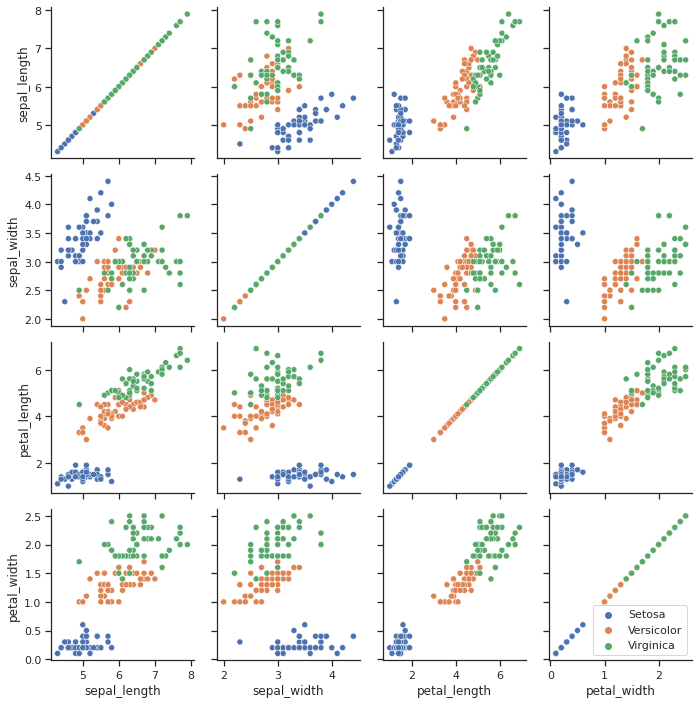

In [4]:
# Using PairGrid
sns.set(style='ticks', color_codes=True)
ScatterMatrix=sns.PairGrid(df,hue='species')
ScatterMatrix.map(sns.scatterplot)
legend=plt.legend()
legend.texts[0].set_text("Setosa")
legend.texts[1].set_text("Versicolor")
legend.texts[2].set_text("Virginica")

plt.show()


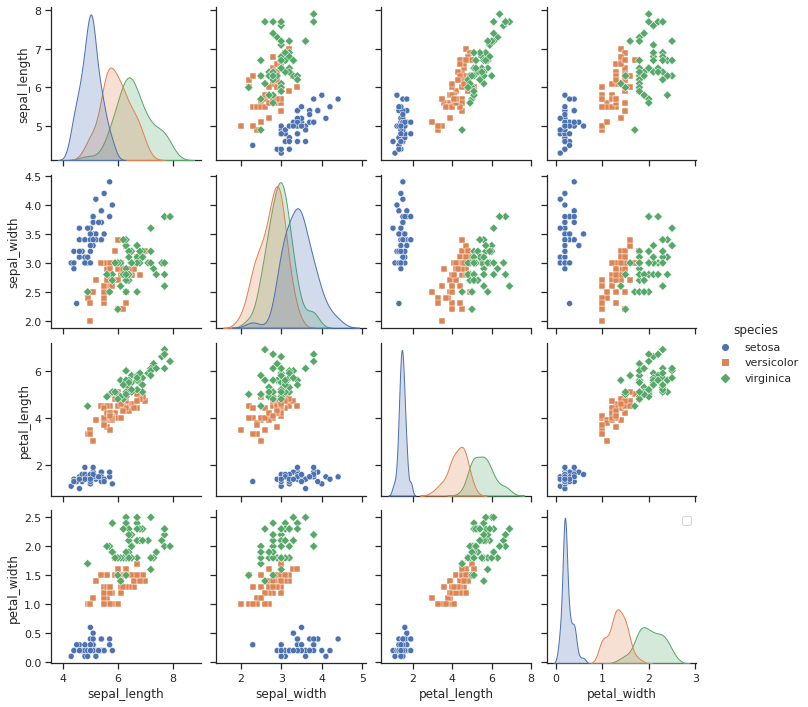

In [5]:
# Markers for each species
marker_dict={'setosa':'o','versicolor':'s','virginica':'D'}

# Using pairplot
sns.set(style='ticks',color_codes=True)
sns.pairplot(df,hue='species',markers=marker_dict)

legend=plt.legend()
if len(legend.texts)>=3:
    legend.texts[0].set_text("Setosa")
    legend.texts[1].set_text("Versicolor") #pairplot, scatterplot
    legend.texts[2].set_text("Virginica")

plt.show()


Check which classes are linearly separable (By  Scatterplot, pairplot matrix and Evaluate the classifier's performance)

' From the resulting plot, it appears that the setosa species is linearly separable from the other two species,\n while versicolor and virginica are not easily separated.'

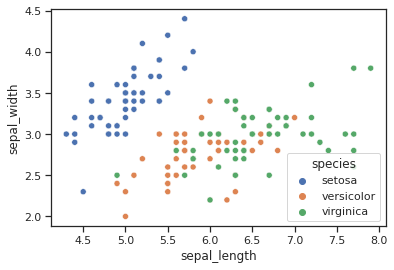

In [6]:
# Using scatterplot
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df)

""" From the resulting plot, it appears that the setosa species is linearly separable from the other two species,
 while versicolor and virginica are not easily separated."""

' From the resulting plot, it appears that the setosa species is linearly separable from the other two species,\n while versicolor and virginica are not easily separated.'

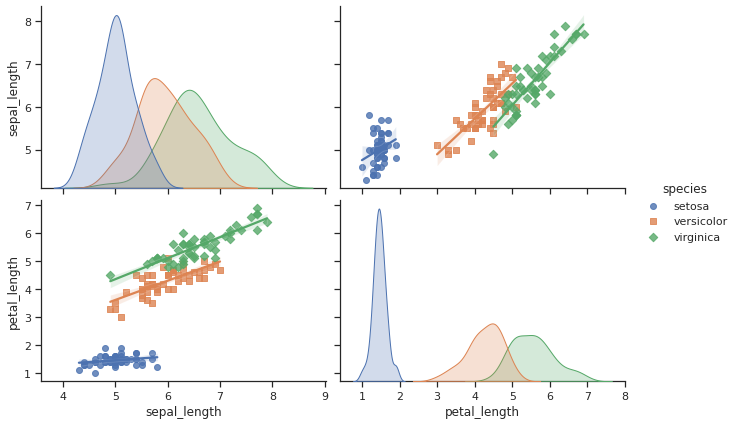

In [7]:
# pairplot matrix
sns.pairplot(data=df, hue='species', height=3, aspect=1.5, markers=['o', 's', 'D'], diag_kind='kde', vars=['sepal_length', 'petal_length'], kind='reg')


""" From the resulting plot, it appears that the setosa species is linearly separable from the other two species,
 while versicolor and virginica are not easily separated."""

In [8]:
# By evaluation of classisier's performance
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a linear SVM classifier
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Evaluate the classifier's performance
accuracy = svm.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

# Check which classes are linearly separable
for i, class1 in enumerate(df['species'].unique()):
    for class2 in df['species'].unique()[i+1:]:
        X_class1 = X[y == class1]
        X_class2 = X[y == class2]
        y_class1 = y[y == class1]
        y_class2 = y[y == class2]
        svm = SVC(kernel='linear')
        svm.fit(pd.concat([X_class1, X_class2]), pd.concat([y_class1, y_class2]))
        if svm.score(X_class1, y_class1) == 1.0 and svm.score(X_class2, y_class2) == 1.0:
            print(f"{class1} and {class2} are linearly separable")

""" If the classifier achieves perfect accuracy on both classes,
 we print a message indicating that the two classes are linearly separable."""

Accuracy: 1.00
setosa and versicolor are linearly separable
setosa and virginica are linearly separable


' If the classifier achieves perfect accuracy on both classes,\n we print a message indicating that the two classes are linearly separable.'

2nd Dataset

In [9]:
df2=pd.read_csv("/content/adult.csv (1).zip")
df2.head(15)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [10]:
# Replace Missing Values
df2[df2=='?']=np.nan
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [11]:
for col in ['workclass','occupation','native-country']:
    df2[col].fillna(df2[col].mode()[0],inplace=True)

df2.head(15)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Private,227026,HS-grad,9,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [12]:
print(df2['race'].unique())

['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']


In [13]:
print(df2['marital-status'].unique())

['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']


In [14]:
# Rename th values of race column
df2['race'] = df2['race'].replace({'Asian-Pac-Islander': 'Asian', 'Amer-Indian-Eskimo':'American'})


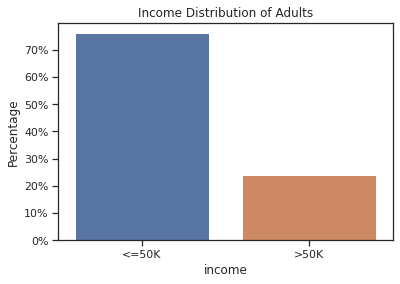

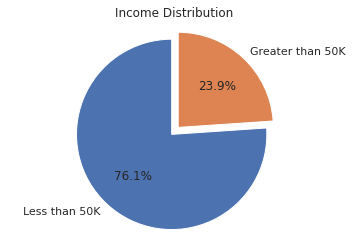

In [16]:
# Create percentage bar chart using sns.barplot
percentage=df2['income'].value_counts(normalize=True).rename_axis('income').reset_index(name='Percentage')
ax1=sns.barplot(x='income', y='Percentage', data=percentage)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df2['income']))
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height() + 3
    ax1.annotate(percentage, (x, y), size=12)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.title('Income Distribution of Adults')

# Create pie chart of income distribution
labels=['Less than 50K', 'Greater than 50K']
sizes=[df2['income'].value_counts()[0],df2['income'].value_counts()[1]]
explode=(0.1, 0)
fig,ax2=plt.subplots()
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax2.axis('equal')
plt.title('Income Distribution')

plt.show()


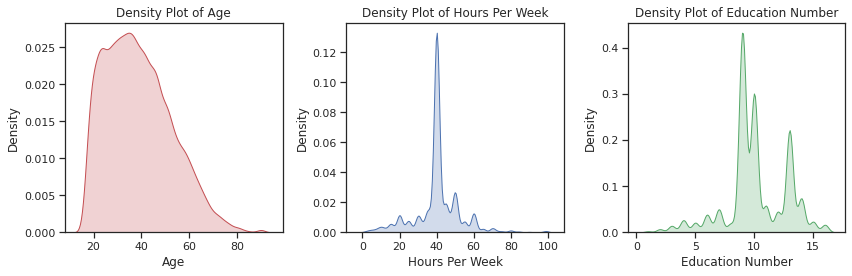

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Density plot for 'age' 
sns.kdeplot(df2['age'],shade=True,color="r",ax=axs[0])
axs[0].set_title("Density Plot of Age")
axs[0].set_xlabel("Age")
axs[0].set_ylabel("Density")

# Density plot for 'hours-per-week' 
sns.kdeplot(df2['hours-per-week'],shade=True,color="b",ax=axs[1])
axs[1].set_title("Density Plot of Hours Per Week")
axs[1].set_xlabel("Hours Per Week")
axs[1].set_ylabel("Density")

# Density plot for 'educational-num' 
sns.kdeplot(df2['educational-num'], shade=True, color="g", ax=axs[2])
axs[2].set_title("Density Plot of Education Number")
axs[2].set_xlabel("Education Number")
axs[2].set_ylabel("Density")

plt.tight_layout()
plt.show()


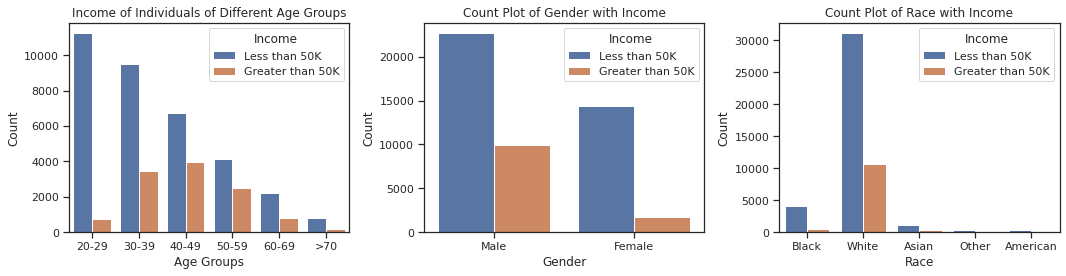

In [18]:
# Create a figure with 1 row and 3 columns
fig, axs = plt.subplots(ncols=3, figsize=(15, 4))
df2['age_group'] = pd.cut(df2['age'], bins=[19, 29, 39, 49, 59, 69, 100], labels=['20-29', '30-39', '40-49', '50-59', '60-69', '>70'])

# Count plot for 'age_group' 
sns.countplot(data=df2, x='age_group', hue='income', ax=axs[0])
axs[0].set_title("Income of Individuals of Different Age Groups")
axs[0].set_xlabel("Age Groups")
axs[0].set_ylabel("Count")
axs[0].legend(title='Income', loc='upper right', labels=['Less than 50K', 'Greater than 50K'])

# Count plot for 'gender' 
sns.countplot(data=df2, x='gender', hue='income', ax=axs[1])
axs[1].set_title("Count Plot of Gender with Income")
axs[1].set_xlabel("Gender")
axs[1].set_ylabel("Count")
axs[1].legend(title='Income', loc='upper right', labels=['Less than 50K', 'Greater than 50K'])

# Count plot for 'race'
sns.countplot(data=df2, x='race', hue='income', ax=axs[2])
axs[2].set_title("Count Plot of Race with Income")
axs[2].set_xlabel("Race")
axs[2].set_ylabel("Count")
axs[2].legend(title='Income', loc='upper right', labels=['Less than 50K', 'Greater than 50K'])

plt.tight_layout()
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


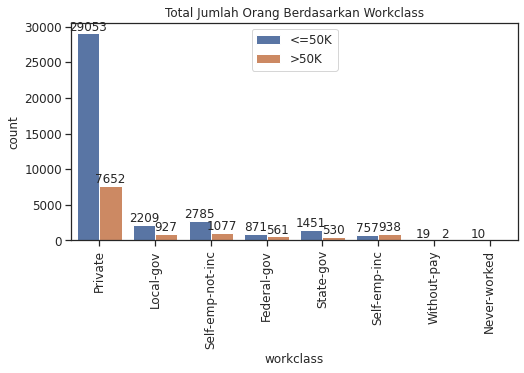

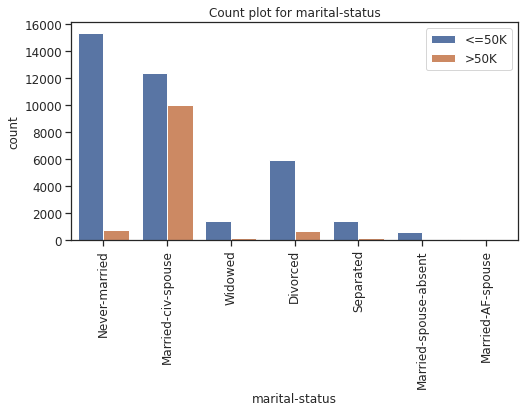

In [19]:
# Total Jumlah Orang Berdasarkan Workclass
plt.figure(figsize=(8,4))
ax = sns.countplot(df2['workclass'], hue = df2['income'])
plt.title('Total Jumlah Orang Berdasarkan Workclass', fontsize=12)
plt.xticks(fontsize=12,rotation = 90)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()


# Count plot for marital-status 
plt.figure(figsize=(8,4))
sns.countplot(data=df2, x='marital-status', hue='income')
plt.title('Count plot for marital-status', fontsize=12)
plt.xticks(fontsize=12,rotation = 90)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()


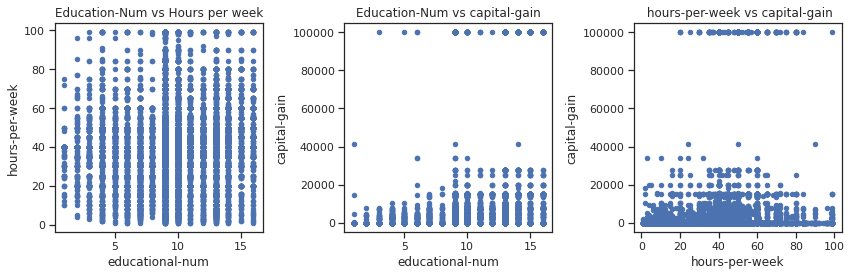

In [20]:
fig, axs = plt.subplots(ncols=3, figsize=(12, 4))

# Educational-Num vs Hours per week scatter plot
df2.plot.scatter(ax=axs[0], x='educational-num', y='hours-per-week', title='Education-Num vs Hours per week')

# Educational-Num vs capital-gain
df2.plot.scatter(ax=axs[1], x='educational-num', y='capital-gain', title='Education-Num vs capital-gain')

# hours-per-week vs capital-gain
df2.plot.scatter(ax=axs[2],x='hours-per-week', y ='capital-gain', 
                title =' hours-per-week vs capital-gain')
plt.tight_layout()
plt.show()


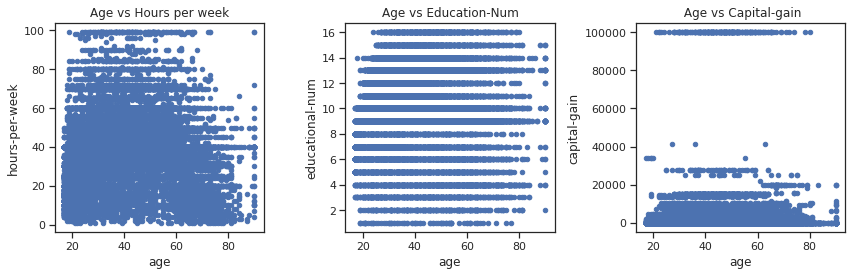

In [21]:
fig, axs = plt.subplots(ncols=3, figsize=(12,4))

# Scatter plot Age vs Hours per week 
df2.plot.scatter(ax=axs[0], x='age', y='hours-per-week', title='Age vs Hours per week')

# Scatter plot Age vs Education-Num
df2.plot.scatter(ax=axs[1], x='age', y='educational-num', title='Age vs Education-Num')

# Scatter plot Age vs capital-gain
df2.plot.scatter(ax=axs[2],x='age', y ='capital-gain', 
                title =' Age vs Capital-gain')
plt.tight_layout()
plt.show()


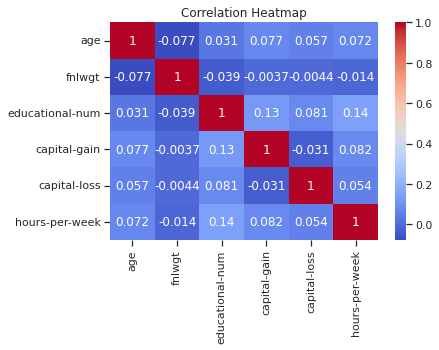

In [22]:
# Heatmap of Correlation between Numeric Features
numeric_features =df2.select_dtypes(include=['int64'])
corr_matrix = numeric_features.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
